In [17]:
import pyvisa
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline
figure(figsize=(18, 16), dpi=80)

<Figure size 1440x1280 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [18]:
rm=pyvisa.ResourceManager('/Library/Frameworks/visa.framework/visa')
print(rm)

Resource Manager of Visa Library at /Library/Frameworks/visa.framework/visa


In [19]:
res=rm.list_resources()
print(type(res), ' --> ', res)
print('First device found on LAN :', res[0])

<class 'tuple'>  -->  ()


IndexError: tuple index out of range

In [10]:
rigol = rm.open_resource(res[0])

IndexError: tuple index out of range

In [34]:
# autoscale display on screen
# rigol.write('autoscale')

set_freq = 87654    # Hertz
rigol.write('1:frequency '+ str(set_freq))  # freq
rigol.write('1:apply:sin')  #sine
rigol.write('autoscale')    #autoscale
rigol.write('1:output ON')  #turn on G1 function gen

# delay here so the next command below doesn't time out
time.sleep(3) # sec delay

# measure channel 1 
rigol.write('measure:source chan1')
rigol.write('measure:item freq,channel1')
freq = rigol.query('measure:item? freq,channel1')
print('Freq (Hz): ', freq)

# delay here so the command below doesn't time out
time.sleep(2) # sec delay

# display counter on screen
rigol.write('counter:enable ON')
rigol.write('counter:source channel1')

# adjust waveform display on screen
rigol.write('system:key:decrease hscale,1')

Freq (Hz):  8.7873E+04



30

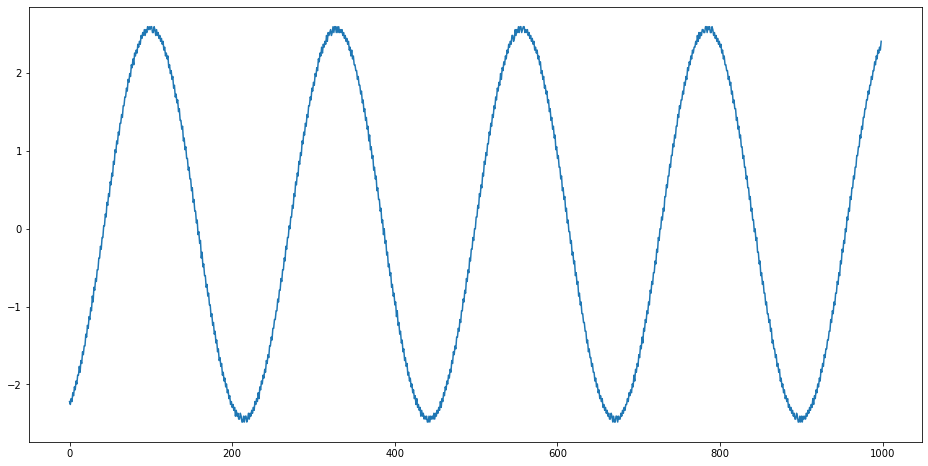

In [90]:
# get waveform data values
rigol.write('waveform:source channel1')
rigol.write('waveform:mode normal')
rigol.write('waveform:format ascii')
rigol.write('waveform:points 1000')   # number of sample points
data=rigol.query('waveform:data?')   # send query 
wave_dataset = data.split(',')       # split the commas, to convert into a list
wave_dataset.pop(0)                  # first item [0] contains TMC header
wave_dataset.pop(-1)               # contains carriage return
wave_dataset_float = [float(item) for item in wave_dataset]   # convert to float so we can plot it correctly

# plot it
plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(wave_dataset_float)
plt.show()

In [ ]:
# get waveform data values
rigol.write('waveform:source channel1')
rigol.write('waveform:mode normal')
rigol.write('waveform:format ascii')
rigol.write('waveform:points 1000')   # sample 500 points
data=rigol.query('waveform:data?')   # send query 
wave_dataset = data.split(',')       # split the commas, to convert into a list
wave_dataset.pop(0)                  # first item [0] contains TMC header
wave_dataset.pop(-1)                 # contains carriage return
# print(wave_dataset)

wave_dataset_float = [float(item) for item in wave_dataset]
# print(wave_dataset_float)
# for wave_data in wave_dataset_float:
#   print(wave_data)                 # print each value into it's own line

# plot it
plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(wave_dataset_float)
plt.show()

In [11]:
print('Device Name: ', rigol.query('*IDN?'))
print('IP Address: ', rigol.query('LAN:IPAD?'))
print('MAC Address: ', rigol.query('LAN:MAC?'))
print('DNS: ', rigol.query('LAN:DNS?'))

NameError: name 'rigol' is not defined

In [ ]:
rigol.write('autoscale')

In [ ]:
rigol.write('BODEPLOT:ENABLE ON')

In [ ]:
rigol.write('bodeplot:stop 500')

In [ ]:
rigol.write('BODEPLOT:ENABLE OFF')

In [ ]:
#get voltage of bodeplot
rigol.write('bodeplot:voltage?F100HZ')

In [ ]:
rigol.write('bus1:mode CAN')

In [ ]:
rigol.write('bus1:display off')

In [ ]:
rigol.write('channel4:display ON')

In [ ]:
rigol.write('counter:enable ON')

In [ ]:
rigol.write('counter:source channel1')

In [ ]:
set_freq = 87654    # Hertz
rigol.write('1:frequency '+ str(set_freq))  # freq
rigol.write('1:apply:sin')  #sine
rigol.write('autoscale')    #autoscale
rigol.write('1:output ON')  #turn on G1 function gen

# delay here so the next command below doesn't time out
time.sleep(2) # sec delay

# measure channel 1 
rigol.write('measure:source chan1')
rigol.write('measure:item freq,channel1')
freq = rigol.query('measure:item? freq,channel1')
print('Freq: ', freq)

# delay here so the command below doesn't time out
time.sleep(1) # sec delay

# display counter on screen
rigol.write('counter:enable ON')
rigol.write('counter:source channel1')

# autoscale display on screen
rigol.write('autoscale')